In [54]:
import numpy as np

import astropy
import astropy.units as ur
import astropy.constants as cr

%matplotlib inline

from astropy.io import fits
from specutils import Spectrum1D
from specutils.manipulation import (box_smooth, gaussian_smooth, trapezoid_smooth)

from pylab import *

import scipy.interpolate as II

import matplotlib.pyplot as plt

plt.style.use('seaborn-dark-palette')


In [47]:
box_smooth(spec, width=5)

<Spectrum1D(flux=<Quantity [3.4834242e-16, 4.6109354e-16, 5.6991790e-16, ..., 1.9155862e-16,
           1.5301162e-16, 1.1452922e-16] erg / (Angstrom cm2 s)>, spectral_axis=<Quantity [3492.9375    , 3495.77274132, 3498.60798264, ..., 8760.81586838,
           8763.6511097 , 8766.48635101] Angstrom>)>

In [50]:
fs = [("spec-0385-51783-0360.fits", "CL AGN Type I"), ("spec-1737-53055-0369.fits", "Coronal line TDE"),
     ("spec-4213-55449-0530.fits", "CL AGN Type II")]

res = {}
for f,n in fs:
    f = fits.open(f)  # CL AGN Type I Phase
    # The spectrum is in the second HDU of this file.
    specdata = f[1].data # doctest: +REMOTE_DATA
    f.close() # doctest: +REMOTE_DATA
    
    lamb = 10**specdata['loglam'] * ur.AA # doctest: +REMOTE_DATA
    flux = specdata['flux'] * 10**-17 * ur.Unit('erg cm-2 s-1 AA-1') # doctest: +REMOTE_DATA
    spec = box_smooth(Spectrum1D(spectral_axis=lamb, flux=flux), width=5)
    
    res[n] = spec


    
fs = [("tns_2018hyz_2018-11-12_13-16-53_FTN_FLOYDS-N.ascii", "18hyz (TDE)"),
     ("tns_2018zd_2018-03-06_03-41-17_P60_SED-Machine_ZTF_0.txt", "18zd (SN II)"),
      ("tns_2019np_2458494.1964_Lijiang-2.4m_YFOSC.dat", "19np (SN Ia)")
     ]

for f,n in fs:
    lam, flux = np.loadtxt(f).T
    spec = Spectrum1D(spectral_axis=lam * ur.AA, flux=flux * ur.Unit('erg cm-2 s-1 AA-1') ) # doctest: +REMOTE_DATA
    
    res[n] = spec

In [65]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 24}

matplotlib.rc('font', **font)

/Users/npk/Dropbox/virtualenv/astropy/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


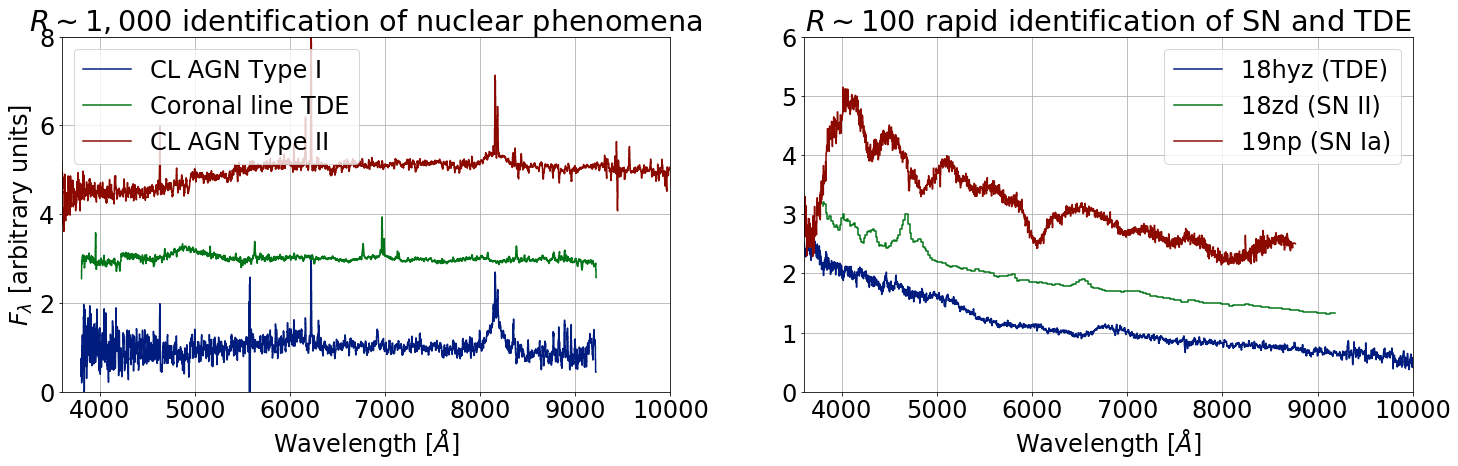

In [66]:
lamb = 10**specdata['loglam'] * ur.AA # doctest: +REMOTE_DATA
flux = specdata['flux'] * 10**-17 * ur.Unit('erg cm-2 s-1 AA-1') # doctest: +REMOTE_DATA
cl_I = Spectrum1D(spectral_axis=lamb, flux=flux) # doctest: +REMOTE_DATA

figure(figsize=(21,7))

subplot(1,2,1)

ls = []
i = 0
for k, r in res.items():
    if "18" in k: continue
    if "19" in k: continue
    step(r.spectral_axis, r.flux / np.median(r.flux) + i)
    i += 2
    
    ls.append(k)

legend(ls)
ylim(0,8)
xlim(3600, 10000)
grid(True)
title("$R\sim1,000$ identification of nuclear phenomena")
xlabel("Wavelength [$\AA$]")
ylabel("$F_\lambda$ [arbitrary units]")

subplot(1,2,2)

ls = []
i = 0
for k, r in res.items():
    if "CL" in k: continue
    if "Coronal" in k: continue
    step(r.spectral_axis, r.flux / np.median(r.flux) + i)
    i += 1

    
    ls.append(k)

legend(ls)
ylim(0,6)
xlim(3600, 10000)
title("$R\sim100$ rapid identification of SN and TDE")
grid(True)
xlabel("Wavelength [$\AA$]")

tight_layout()
